# Ejemplo práctico FP-Growth

## 1. Importar librerias

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from apyori import apriori
from fim import eclat
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

%matplotlib notebook

## 2. Cargar archivo

https://www.kaggle.com/mathchi/online-retail-data-set-from-ml-repository

In [3]:
df = pd.read_csv('retail_dataset.csv')
df.head()

0       1     2       3       4       5       6
0   Bread    Wine  Eggs    Meat  Cheese  Pencil  Diaper
1   Bread  Cheese  Meat  Diaper    Wine    Milk  Pencil
2  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
3  Cheese    Meat  Eggs    Milk    Wine     NaN     NaN
4    Meat  Pencil  Wine     NaN     NaN     NaN     NaN

## 3. Preprocesamiento

In [5]:
df.describe(include='all')

0     1     2     3     4       5      6
count     315   285   245   187   133      71     41
unique      9     9     9     9     9       9      9
top     Bread  Meat  Eggs  Milk  Wine  Pencil  Bread
freq       74    47    52    45    36      13     11

### Pasar datos a una lista

In [6]:
n = df.shape[0]
transactions = []

for i in range(0,n):
    transaction = []
    m = df.shape[1]
    for j in range(0,m):
            itm = str(df.values[i,j])
            if itm != "nan":
                transaction.append(itm)
            transactions.append(transaction)
        

transactions

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Mi

In [7]:
# Utilizar transactionencode, para transformar valor categorica a numerica
# que se encargara de transforma todas las transacciones

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


Bagel  Bread  Cheese  Diaper  Eggs  Meat   Milk  Pencil  Wine
0     False   True    True    True  True  True  False    True  True
1     False   True    True    True  True  True  False    True  True
2     False   True    True    True  True  True  False    True  True
3     False   True    True    True  True  True  False    True  True
4     False   True    True    True  True  True  False    True  True
...     ...    ...     ...     ...   ...   ...    ...     ...   ...
2200   True   True   False   False  True  True  False   False  True
2201   True   True   False   False  True  True  False   False  True
2202   True   True   False   False  True  True  False   False  True
2203   True   True   False   False  True  True  False   False  True
2204   True   True   False   False  True  True  False   False  True

[2205 rows x 9 columns]

## 4. Reglas de asociación: FP-Growth

In [8]:
# Utilizar la funcion fpgrowth para encontrar los item frecuente
# y sus repectivo soporte
# min_support= soporte de 20% 
# max_len=maximo longitud de 3

freq = fpgrowth(df, min_support=0.2,use_colnames=True,max_len=3)
freq = freq.sort_values(by=['support'], inplace=False, ascending=False)
freq

support              itemsets
0   0.504762               (Bread)
1   0.501587              (Cheese)
7   0.501587                (Milk)
2   0.476190                (Meat)
3   0.438095                (Wine)
4   0.438095                (Eggs)
8   0.425397               (Bagel)
5   0.406349              (Diaper)
6   0.361905              (Pencil)
11  0.323810        (Meat, Cheese)
10  0.304762        (Milk, Cheese)
19  0.298413        (Eggs, Cheese)
31  0.279365        (Bagel, Bread)
30  0.279365         (Bread, Milk)
15  0.269841        (Wine, Cheese)
20  0.266667          (Meat, Eggs)
16  0.250794          (Meat, Wine)
17  0.244444         (Bread, Wine)
13  0.244444          (Meat, Milk)
22  0.244444          (Eggs, Milk)
21  0.241270          (Eggs, Wine)
9   0.238095       (Bread, Cheese)
24  0.234921        (Diaper, Wine)
25  0.231746       (Diaper, Bread)
32  0.225397         (Bagel, Milk)
18  0.219048          (Wine, Milk)
23  0.215873  (Meat, Eggs, Cheese)
12  0.206349         (Meat, Bread)
14  0.203175  (Meat, Milk, Cheese)
26  0.200000      (Diaper, Cheese)
27  0.200000        (Pencil, Wine)
28  0.200000      (Pencil, Cheese)
29  0.200000       (Bread, Pencil)

In [9]:
# Obtener las reglas de asociación
rules = association_rules(freq, metric='support', min_threshold=0.2, support_only=False)[['antecedents','consequents','antecedent support','consequent support','support','confidence','lift']]
rules.head(10)

antecedents consequents  antecedent support  consequent support   support  \
0      (Meat)    (Cheese)            0.476190            0.501587  0.323810   
1    (Cheese)      (Meat)            0.501587            0.476190  0.323810   
2      (Milk)    (Cheese)            0.501587            0.501587  0.304762   
3    (Cheese)      (Milk)            0.501587            0.501587  0.304762   
4      (Eggs)    (Cheese)            0.438095            0.501587  0.298413   
5    (Cheese)      (Eggs)            0.501587            0.438095  0.298413   
6     (Bagel)     (Bread)            0.425397            0.504762  0.279365   
7     (Bread)     (Bagel)            0.504762            0.425397  0.279365   
8     (Bread)      (Milk)            0.504762            0.501587  0.279365   
9      (Milk)     (Bread)            0.501587            0.504762  0.279365   

   confidence      lift  
0    0.680000  1.355696  
1    0.645570  1.355696  
2    0.607595  1.211344  
3    0.607595  1.211344  
4    0.681159  1.358008  
5    0.594937  1.358008  
6    0.656716  1.301042  
7    0.553459  1.301042  
8    0.553459  1.103415  
9    0.556962  1.103415

In [10]:
print('Número de reglas de asociación : ',len(rules))

Número de reglas de asociación :  56


## 5. Graficar

<IPython.core.display.Javascript object>


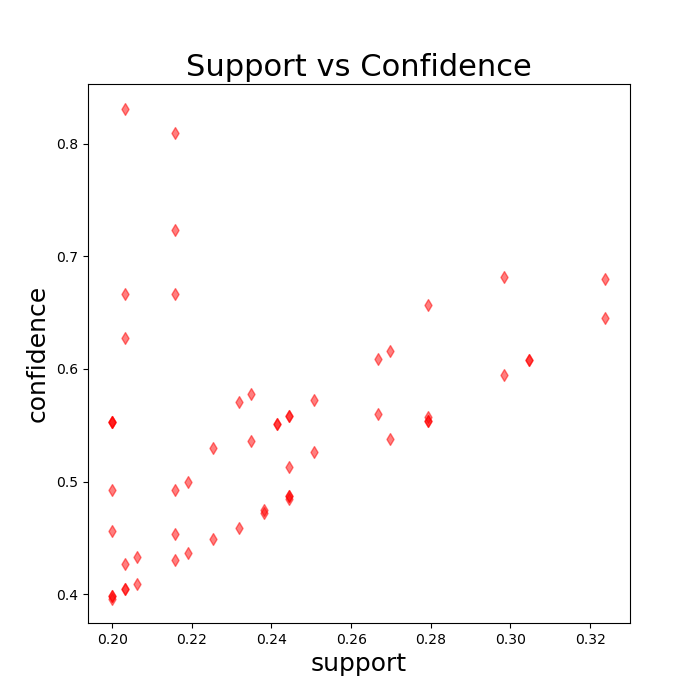

Text(0.5, 1.0, 'Support vs Confidence')

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rules['support'], rules['confidence'], color='red',marker='d',alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Support vs Confidence',fontsize=22)


<IPython.core.display.Javascript object>


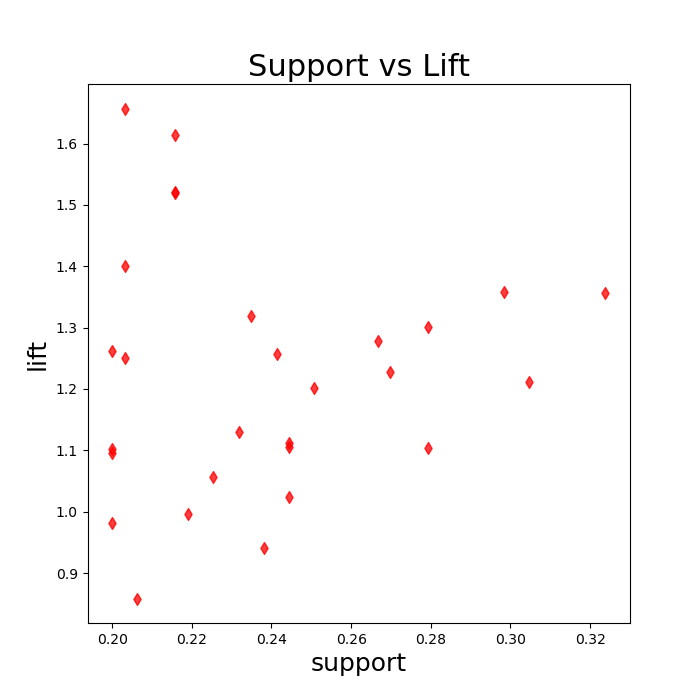

Text(0.5, 1.0, 'Support vs Lift')

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(rules['support'], rules['lift'], color='red',marker='d', alpha=0.5)
ax.set_xlabel('support',fontsize=18)
ax.set_ylabel('lift',fontsize=18)
ax.set_title('Support vs Lift',fontsize=22)

<IPython.core.display.Javascript object>


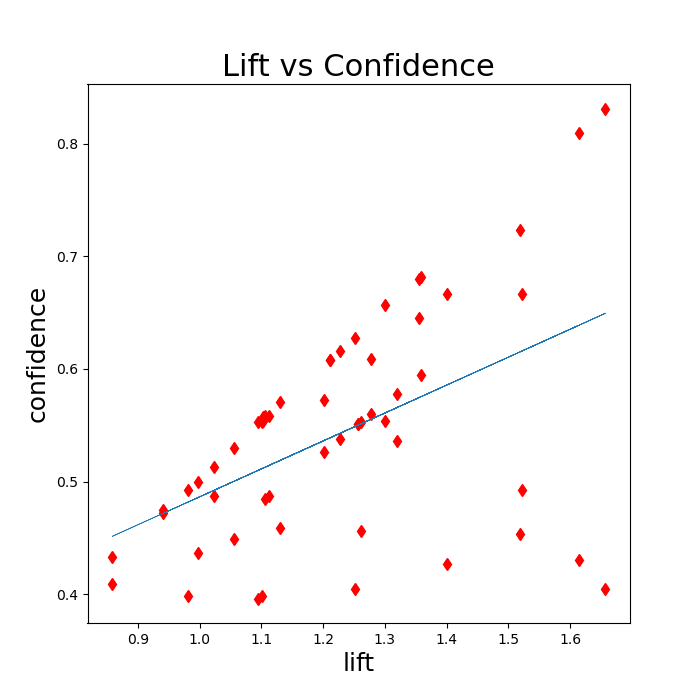

Text(0.5, 1.0, 'Lift vs Confidence')

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
ax.plot(rules['lift'], rules['confidence'],'rd',rules['lift'], fit_fn(rules['lift']),linewidth=0.5)
ax.set_xlabel('lift',fontsize=18)
ax.set_ylabel('confidence',fontsize=18)
ax.set_title('Lift vs Confidence',fontsize=22)


In [14]:
help(fpgrowth)

Help on function fpgrowth in module mlxtend.frequent_patterns.fpgrowth:

fpgrowth(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0)
    Get frequent itemsets from a one-hot DataFrame
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame the encoded format. Also supports
      DataFrames with sparse data; for more info, please
      see (https://pandas.pydata.org/pandas-docs/stable/
           user_guide/sparse.html#sparse-data-structures)
    
      Please note that the old pandas SparseDataFrame format
      is no longer supported in mlxtend >= 0.17.2.
    
      The allowed values are either 0/1 or True/False.
      For example,
    
    ```
           Apple  Bananas   Beer  Chicken   Milk   Rice
        0   True    False   True     True  False   True
        1   True    False   True    False  False   True
        2   True    False   True    False  False  False
        3   True     True  False    False  False  False
        4  False    F

In [15]:
help(association_rules)

Help on function association_rules in module mlxtend.frequent_patterns.association_rules:

association_rules(df, metric='confidence', min_threshold=0.8, support_only=False)
    Generates a DataFrame of association rules including the
    metrics 'score', 'confidence', and 'lift'
    
    Parameters
    -----------
    df : pandas DataFrame
      pandas DataFrame of frequent itemsets
      with columns ['support', 'itemsets']
    
    metric : string (default: 'confidence')
      Metric to evaluate if a rule is of interest.
      **Automatically set to 'support' if `support_only=True`.**
      Otherwise, supported metrics are 'support', 'confidence', 'lift',
      'leverage', and 'conviction'
      These metrics are computed as follows:
    
      - support(A->C) = support(A+C) [aka 'support'], range: [0, 1]
    
      - confidence(A->C) = support(A+C) / support(A), range: [0, 1]
    
      - lift(A->C) = confidence(A->C) / support(C), range: [0, inf]
    
      - leverage(A->C) = suppo